In [1]:
# Intitial imports

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [2]:
# Importing the CSV files for the Whale returns, Algorithmic returns, and S&P 500 closing history

whales_returns = pd.read_csv('whale_returns.csv', index_col = "Date", parse_dates = True, infer_datetime_format = True)
algo_returns = pd.read_csv('algo_returns.csv', index_col = "Date", parse_dates = True, infer_datetime_format = True)
sp500_history = pd.read_csv('sp500_history.csv', index_col = "Date", parse_dates = True, infer_datetime_format = True)

In [3]:
whales_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [4]:
# Displaying the info to detect the number of null values, and seeing if other datatypes exist

whales_returns.info()
whales_returns.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1060 entries, 2015-03-02 to 2019-05-01
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1059 non-null   float64
 1   PAULSON & CO.INC.            1059 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1059 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1059 non-null   float64
dtypes: float64(4)
memory usage: 41.4 KB


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Removing the null values from the Whales returns file

whales_returns = whales_returns.dropna()
whales_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [6]:
# Verifying that all nulls been removed
whales_returns.info()
whales_returns.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1059 entries, 2015-03-03 to 2019-05-01
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1059 non-null   float64
 1   PAULSON & CO.INC.            1059 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1059 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1059 non-null   float64
dtypes: float64(4)
memory usage: 41.4 KB


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [7]:
algo_returns

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [8]:
# Displaying the info to detect the number of null values, and seeing if other datatypes exist

algo_returns.info()
algo_returns.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1241 entries, 2014-05-28 to 2019-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Algo 1  1241 non-null   float64
 1   Algo 2  1235 non-null   float64
dtypes: float64(2)
memory usage: 29.1 KB


Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Removing the null values from the Whales returns file

algo_returns = algo_returns.dropna()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [10]:
# Displaying the info to detect the number of null values, and seeing if other datatypes exist

algo_returns.info()
algo_returns.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2014-06-05 to 2019-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Algo 1  1235 non-null   float64
 1   Algo 2  1235 non-null   float64
dtypes: float64(2)
memory usage: 28.9 KB


Algo 1    0
Algo 2    0
dtype: int64

In [11]:
sp500_history

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [12]:
# Displaying the info to detect the number of null values, and the different datatypes
sp500_history.info()
sp500_history.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


Close    0
dtype: int64

In [13]:
# Remove the $ from in front of the amounts

sp500_history['Close'] = sp500_history['Close'].str.replace("$","")

# COnvert the datatype for the Close column from object to float

sp500_history['Close'] = sp500_history['Close'].astype("float")

In [14]:
sp500_history

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [15]:
# Displaying the info to confirm change in datatypes
sp500_history.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1649 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB


In [16]:
# Sort data in ascending order by date

sp500_history.sort_values('Date', inplace = True)
sp500_history

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [17]:
# Obtain daily returns from the SP500 history data

sp500_returns = sp500_history.pct_change()
sp500_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [18]:
# Displaying the info to detect the number of null values
sp500_returns.info()
sp500_returns.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2012-10-01 to 2019-04-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1648 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB


Close    1
dtype: int64

In [19]:
# Removing the null values

sp500_returns = sp500_returns.dropna()
sp500_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [20]:
# Renaming the Close column to S&P

sp500_returns = sp500_returns.rename(columns = {'Close':'S&P'})
sp500_returns.head()

,S&P
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [21]:
# Merging the Whale Returns, Algorithmic Returns, and S&P 500 Returns

portfolio_returns = whales_returns.merge(algo_returns,how='inner',left_index=True,right_index=True)
portfolio_returns = portfolio_returns.merge(sp500_returns,how='inner',left_index=True,right_index=True)
portfolio_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


<AxesSubplot:xlabel='Date'>

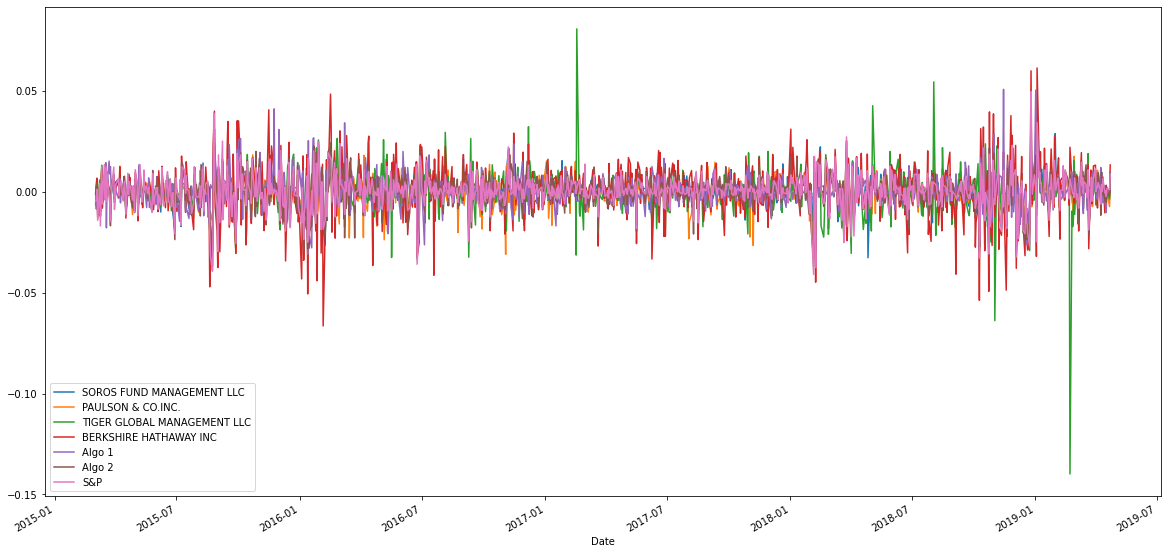

In [22]:
# PERFORMANCE ANALYSIS

# Daily returns for all of the portforlios

portfolio_returns.plot(legend = True, figsize=(20,10))

In [23]:
# Caclulate cumulative returns

cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.995461
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.991093
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.992278
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.978214
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.982072


<AxesSubplot:xlabel='Date'>

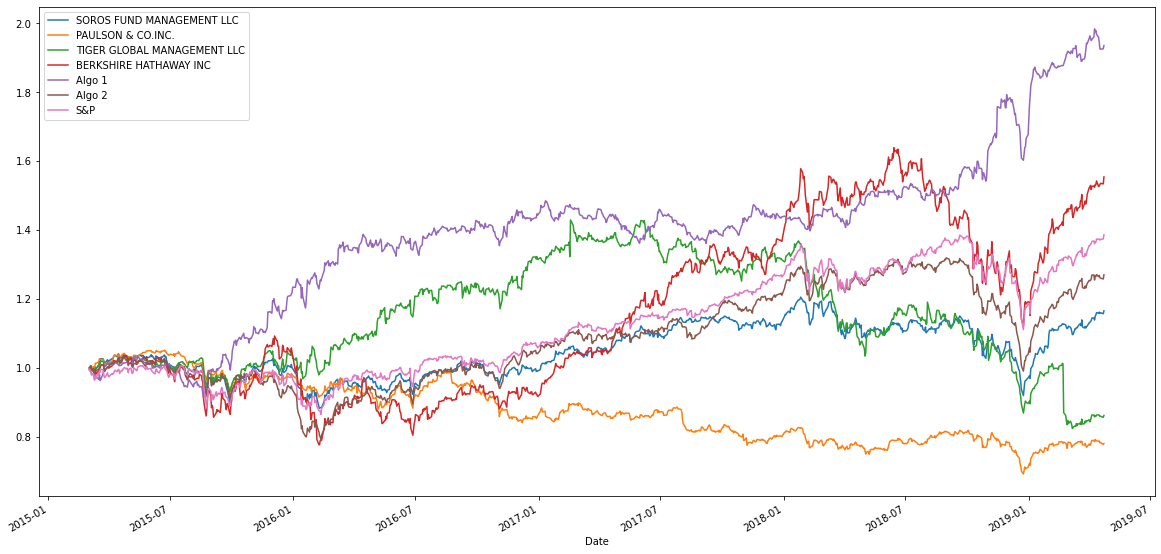

In [24]:
#Plot cumulative returns

cumulative_returns.plot(legend = True, figsize=(20,10))

In [25]:
#Algo 1 and Berkshire Hathaway Inc. outperforms the S&P 500 over the time period analyzed.

<AxesSubplot:>

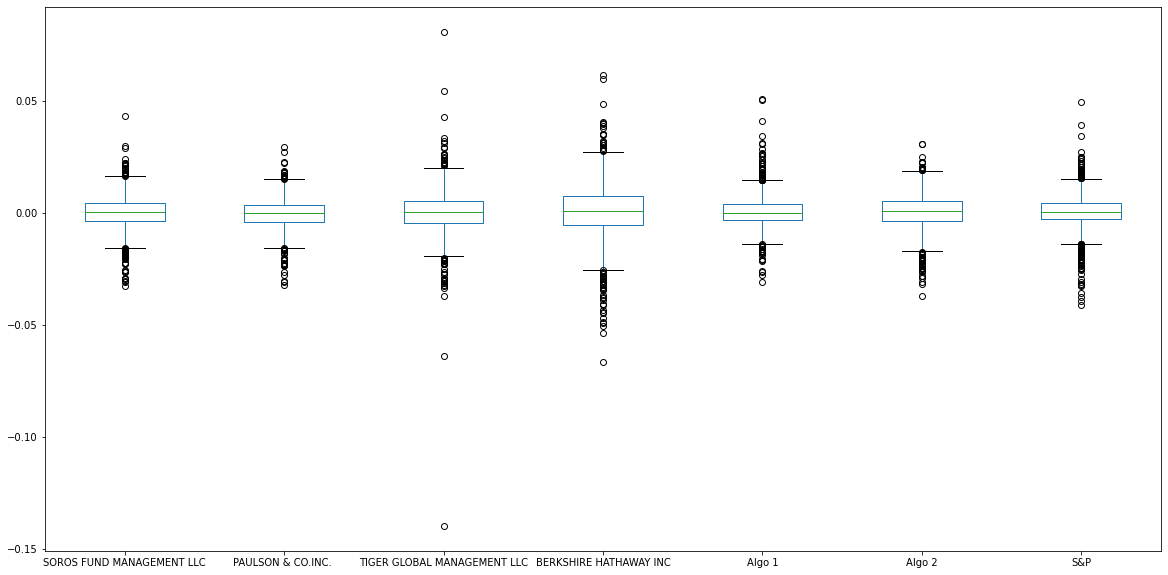

In [26]:
# RISK ANALYSIS

# Create a box plot for each of the portfolios

portfolio_returns.plot(kind = 'box', figsize=(20,10))

In [27]:
# Calculating the standard deviation of each of the portfolios

portfolio_std = portfolio_returns.std()
portfolio_std = portfolio_std.sort_values(ascending=False) #Sort returned values by descending order
portfolio_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P                            0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

In [28]:
# Based on the standard deviation, Berkshire Hathaway Inc. and Tiger Global Management LLC are both riskier than the S&P 500

In [29]:
# Calculating the annualized standard deviation of each of the portfolios

annualized_std = portfolio_std * np.sqrt(252)
annualized_std = annualized_std.sort_values(ascending=False) #Sort returned values by descending order
annualized_std

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P                            0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

In [30]:
# ROLLING STATISTICS

# Calculating the rolling standard deviation of all portfolios using a 21 day window
rolling_std = portfolio_returns.rolling(window = 21).std()
rolling_std

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006470


<AxesSubplot:xlabel='Date'>

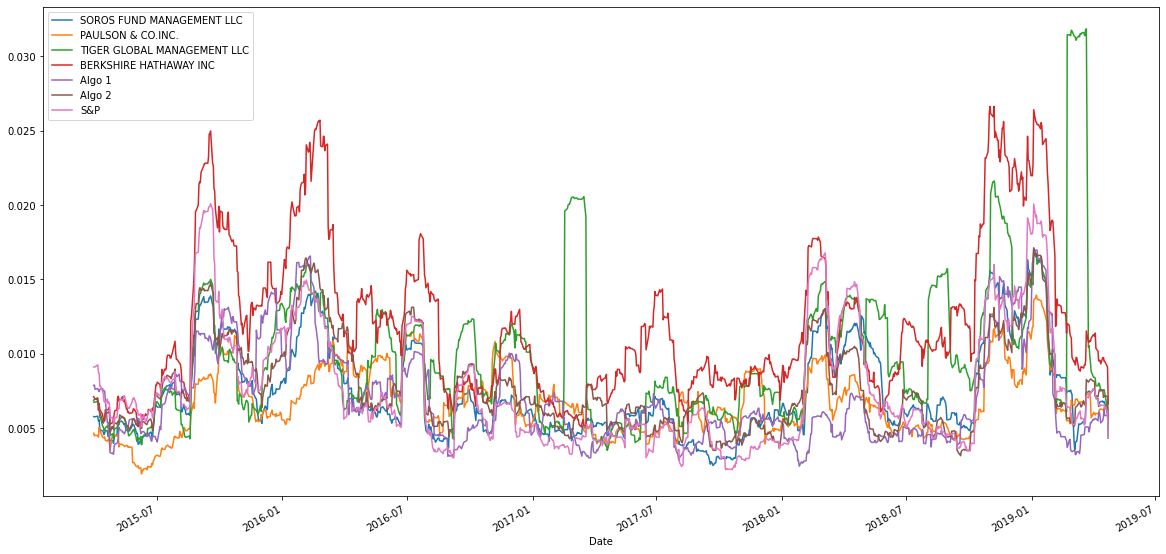

In [31]:
# Ploting the rolling standard deviation of all portfolios using a 21 day window

rolling_std.plot(figsize=(20,10))

In [32]:
#Calculating and diplaying the correlation between the portfolios

portfolio_corr = portfolio_returns.corr()
portfolio_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:>

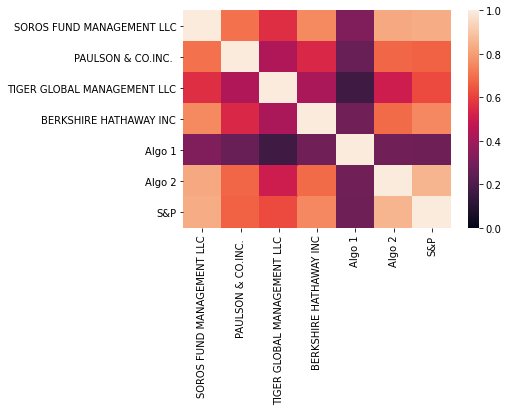

In [33]:
# Displaying the coorelation heatmap

import seaborn as sns # Importing seaborn

sns.heatmap(portfolio_corr,vmin=0,vmax=1)

In [34]:
# Algo 2 and Soros Fund Management LLC may mimick the S&P 500

In [35]:
# Calculating the 60-day rolling beta between Algo 2 and the S&P500

# Calculating the rolling covariance
rolling_covariance = portfolio_returns['Algo 2'].rolling(window = 60).cov(portfolio_returns['S&P'])

# Calculating the rolling variance of S&P500
rolling_variance = portfolio_returns['S&P'].rolling(window = 60).var()

# Calculating the rolling beta between Algo 2 and S&P500

rolling_beta = rolling_covariance / rolling_variance

rolling_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.910622
2019-04-17    0.923897
2019-04-18    0.925305
2019-04-22    0.926647
2019-04-23    0.922600
Length: 1043, dtype: float64

<AxesSubplot:xlabel='Date'>

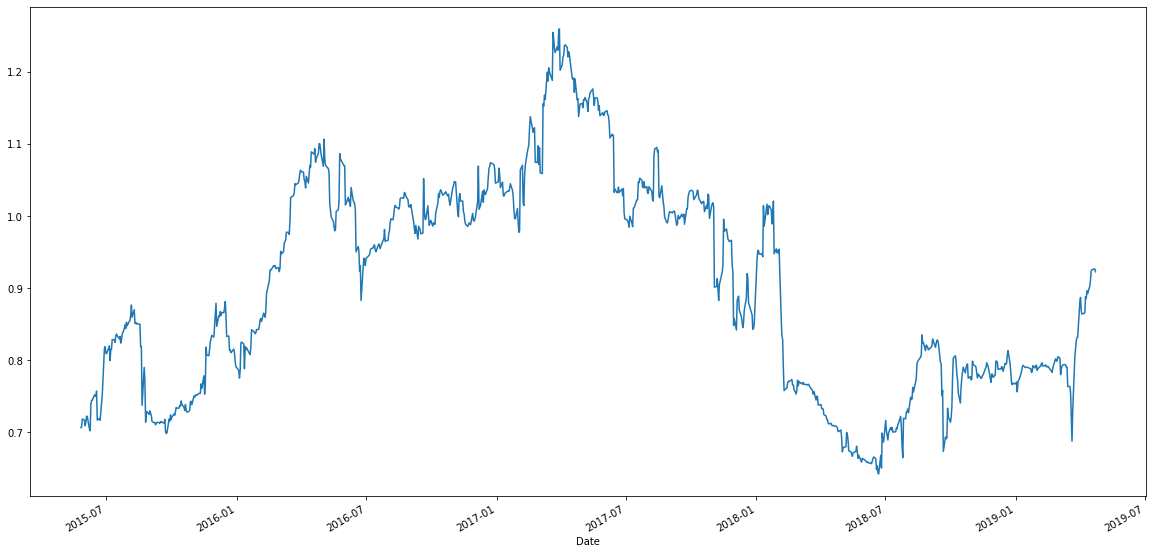

In [36]:
#Ploting the rolling beta

rolling_beta.plot(figsize=(20,10))

In [37]:
# ROLLING STATISTICS CHALLENGE: EXPONENTIALLY WEIGHTED AVERAGE

# Calculating the rolling standard deviation of all portfolios using a 21 halflife and exponentially weighted average
rolling_std_weighted = portfolio_returns.ewm(halflife = 21).std()
rolling_std_weighted

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.000106
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.003294
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.006498
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.007083
...,...,...,...,...,...,...,...
2019-04-16,0.007632,0.006846,0.016301,0.011939,0.006922,0.007938,0.007837
2019-04-17,0.007547,0.006846,0.016047,0.011746,0.007097,0.007896,0.007736
2019-04-18,0.007424,0.006737,0.015787,0.011554,0.006984,0.007779,0.007610


<AxesSubplot:xlabel='Date'>

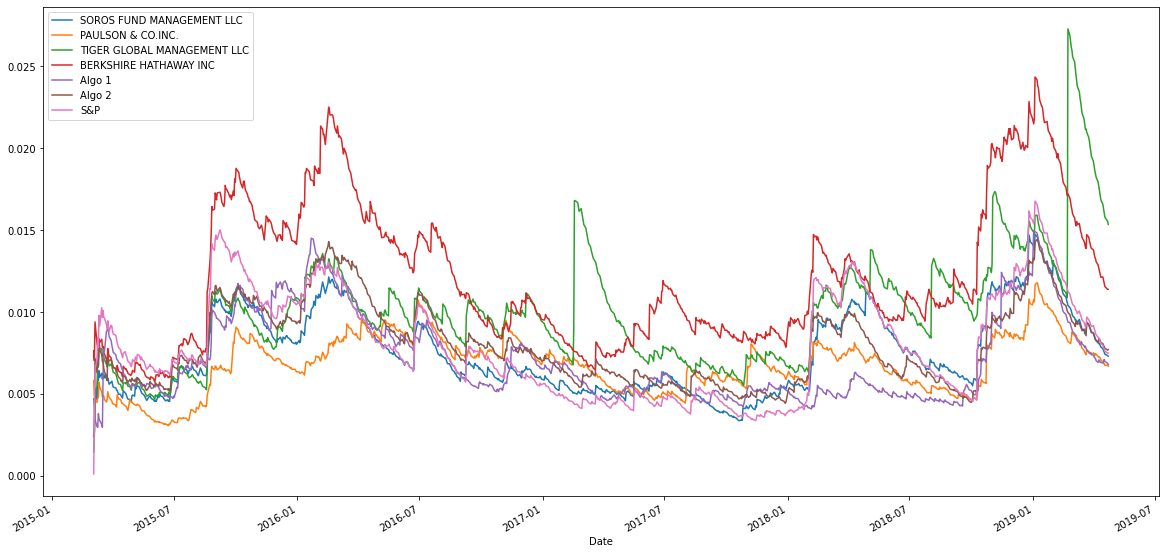

In [38]:
rolling_std_weighted.plot(figsize=(20,10))

In [39]:
#SHARPE RATIOS

# Import the risk free rate file

riskfreerate = pd.read_csv('risk_free_rate.csv',index_col='Date',parse_dates=True,infer_datetime_format=True)
riskfreerate

,rf_rate
Date,
1954-01-04,0.000148
1954-01-05,0.000142
1954-01-06,0.000142
1954-01-07,0.000146
1954-01-08,0.000146
...,...
2020-11-27,0.000010
2020-11-30,0.000009
2020-12-01,0.000010


In [40]:
# Merge the risk free rate with the portfolio returns dataframe

portfolio_returns = portfolio_returns.merge(riskfreerate,how='inner',left_index=True,right_index=True)
portfolio_returns




,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P,rf_rate
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,0.000002
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,0.000001
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.000002
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,0.000001
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.000002
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000264
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.000266
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.000263


In [41]:
portfolio_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1036 entries, 2015-03-03 to 2019-04-23
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1036 non-null   float64
 1   PAULSON & CO.INC.            1036 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1036 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1036 non-null   float64
 4   Algo 1                       1036 non-null   float64
 5   Algo 2                       1036 non-null   float64
 6   S&P                          1036 non-null   float64
 7   rf_rate                      1036 non-null   float64
dtypes: float64(8)
memory usage: 72.8 KB


In [42]:
# Calculate the sharp ratio

portfolio_sharpe_ratio = (((portfolio_returns.mean()-portfolio_returns['rf_rate'].mean())*1036)/(portfolio_returns.std()*np.sqrt(1036) ))
portfolio_sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.412882
PAULSON & CO.INC.             -1.425583
TIGER GLOBAL MANAGEMENT LLC   -0.569213
BERKSHIRE HATHAWAY INC         1.056907
Algo 1                         2.326728
Algo 2                         0.636932
S&P                            0.998030
rf_rate                        0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

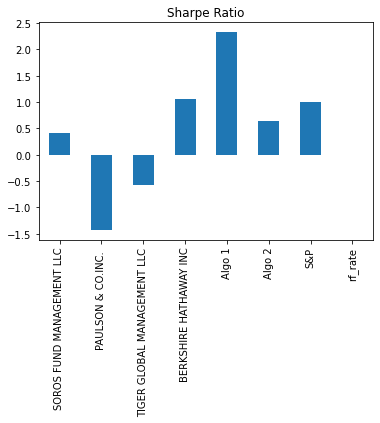

In [43]:
# Plot the sharpe ratio in a bar graph

portfolio_sharpe_ratio.plot.bar(title = 'Sharpe Ratio')

In [44]:
# Algorithmic strategies 1 (Algo 1) outperforms the market (S&P 500) and the whales portfolio
# Algorithmic strategies 2 (Algo 2) underperforms the market and Berkshire Hathaway Inc.

In [45]:
# CREATE A CUSTOM PORTFOLIO

#Import CSV files for custom porfolio

amd_historical = pd.read_csv('amd_historical.csv', index_col = "Date", parse_dates = True, infer_datetime_format = True) # Import AMD historical data
atvi_historical = pd.read_csv('atvi_historical.csv', index_col = "Date", parse_dates = True, infer_datetime_format = True) # Import Activision BLizzard historical data
fb_historical = pd.read_csv('fb_historical.csv', index_col = "Date", parse_dates = True, infer_datetime_format = True) # Import Facebook historical data
intc_historical = pd.read_csv('intc_historical.csv', index_col = "Date", parse_dates = True, infer_datetime_format = True) # Import Intel historical data

In [46]:
amd_historical.head()

,Close
Date,
2014-01-02 16:00:00,3.95
2014-01-03 16:00:00,4.00
2014-01-06 16:00:00,4.13
2014-01-07 16:00:00,4.18
2014-01-08 16:00:00,4.18


In [47]:
# Rename the Close column to the name of the stock

amd_historical = amd_historical.rename(columns = {'Close':'AMD'})
atvi_historical = atvi_historical.rename(columns = {'Close':'ATVI'})
fb_historical = fb_historical.rename(columns = {'Close':'FB'})
intc_historical = intc_historical.rename(columns = {'Close':'INTC'})

In [48]:
# Combine all historical data into custom portfolio

custom_portfolio = pd.concat([amd_historical, atvi_historical, fb_historical, intc_historical],axis = 'columns', join = 'inner')
custom_portfolio.head()

,AMD,ATVI,FB,INTC
Date,,,,
2014-01-02 16:00:00,3.95,18.07,54.71,25.79
2014-01-03 16:00:00,4.00,18.29,54.56,25.78
2014-01-06 16:00:00,4.13,18.08,57.20,25.46
2014-01-07 16:00:00,4.18,18.32,57.92,25.59
2014-01-08 16:00:00,4.18,18.34,58.23,25.43


In [49]:
# Calculate daily returns

custom_portfolio_returns = custom_portfolio.pct_change().dropna()
custom_portfolio_returns

,AMD,ATVI,FB,INTC
Date,,,,
2014-01-03 16:00:00,0.012658,0.012175,-0.002742,-0.000388
2014-01-06 16:00:00,0.032500,-0.011482,0.048387,-0.012413
2014-01-07 16:00:00,0.012107,0.013274,0.012587,0.005106
2014-01-08 16:00:00,0.000000,0.001092,0.005352,-0.006252
2014-01-09 16:00:00,-0.021531,-0.002181,-0.017345,-0.004719
...,...,...,...,...
2019-12-24 13:00:00,0.023757,-0.001358,-0.005141,0.003039
2019-12-26 16:00:00,0.001934,0.001360,0.013017,0.006901
2019-12-27 16:00:00,-0.009650,0.005094,0.001492,0.004346


In [50]:
# Calculate weighted returns for the portfolio

w = [0.25,0.25,0.25,0.25] # Defining the weights of each stock. All stocks have even weights

custom_portfolio_weighted_returns = (w * custom_portfolio_returns)
custom_portfolio_weighted_returns.head()

,AMD,ATVI,FB,INTC
Date,,,,
2014-01-03 16:00:00,0.003165,0.003044,-0.000685,-0.000097
2014-01-06 16:00:00,0.008125,-0.002870,0.012097,-0.003103
2014-01-07 16:00:00,0.003027,0.003319,0.003147,0.001277
2014-01-08 16:00:00,0.000000,0.000273,0.001338,-0.001563
2014-01-09 16:00:00,-0.005383,-0.000545,-0.004336,-0.001180


In [51]:
# Calculating the sum of all the weights to determine the entire portifilio return.

custom_portfolio_weighted_returns['Custom Portfolio'] = custom_portfolio_weighted_returns.sum(axis=1)
custom_portfolio_weighted_returns.head()


,AMD,ATVI,FB,INTC,Custom Portfolio
Date,,,,,
2014-01-03 16:00:00,0.003165,0.003044,-0.000685,-0.000097,0.005426
2014-01-06 16:00:00,0.008125,-0.002870,0.012097,-0.003103,0.014248
2014-01-07 16:00:00,0.003027,0.003319,0.003147,0.001277,0.010769
2014-01-08 16:00:00,0.000000,0.000273,0.001338,-0.001563,0.000048
2014-01-09 16:00:00,-0.005383,-0.000545,-0.004336,-0.001180,-0.011444


In [52]:
# Drop the time portion of the date using the normalize function

custom_portfolio_weighted_returns.index = custom_portfolio_weighted_returns.index.normalize()
custom_portfolio_weighted_returns.head()


,AMD,ATVI,FB,INTC,Custom Portfolio
Date,,,,,
2014-01-03,0.003165,0.003044,-0.000685,-0.000097,0.005426
2014-01-06,0.008125,-0.002870,0.012097,-0.003103,0.014248
2014-01-07,0.003027,0.003319,0.003147,0.001277,0.010769
2014-01-08,0.000000,0.000273,0.001338,-0.001563,0.000048
2014-01-09,-0.005383,-0.000545,-0.004336,-0.001180,-0.011444


In [53]:
# Add the custom portfolio returns to the portfolio returns

portfolio_returns = portfolio_returns.merge(custom_portfolio_weighted_returns['Custom Portfolio'],how='inner',left_index=True,right_index=True)
portfolio_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P,rf_rate,Custom Portfolio
Date,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,0.000002,-0.007241
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,0.000001,-0.004776
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.000002,-0.003712
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,0.000001,-0.015092
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.000002,-0.001756


In [54]:
portfolio_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1036 entries, 2015-03-03 to 2019-04-23
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1036 non-null   float64
 1   PAULSON & CO.INC.            1036 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1036 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1036 non-null   float64
 4   Algo 1                       1036 non-null   float64
 5   Algo 2                       1036 non-null   float64
 6   S&P                          1036 non-null   float64
 7   rf_rate                      1036 non-null   float64
 8   Custom Portfolio             1036 non-null   float64
dtypes: float64(9)
memory usage: 80.9 KB


In [55]:
# Calculating the annualized standard deviation of each of the portfolios including the custom portfolio

portfolio_std = portfolio_returns.std()
annualized_std = portfolio_std * np.sqrt(252)
annualized_std = annualized_std.sort_values(ascending=False) #Sort returned values by descending order
annualized_std

Custom Portfolio               0.271775
BERKSHIRE HATHAWAY INC         0.205402
TIGER GLOBAL MANAGEMENT LLC    0.173125
S&P                            0.135849
Algo 2                         0.132329
SOROS FUND MANAGEMENT LLC      0.125374
Algo 1                         0.121092
PAULSON & CO.INC.              0.111482
rf_rate                        0.001457
dtype: float64

In [56]:
# Calculating the rolling standard deviation of all portfolios including the custom portfolio using a 21 day window

rolling_std = portfolio_returns.rolling(window = 21).std()
rolling_std

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P,rf_rate,Custom Portfolio
Date,,,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498,0.000002,0.017366
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537,0.000002,0.015369
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006470,0.000002,0.015358


<AxesSubplot:xlabel='Date'>

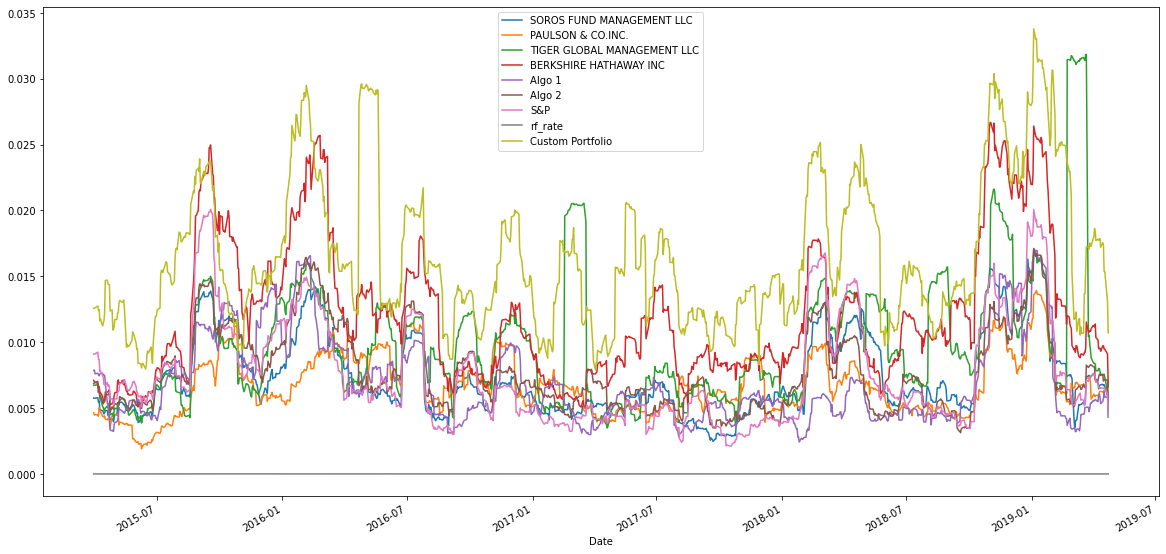

In [57]:
# Ploting the rolling standard deviation of all portfolios including the custom portfolio using a 21 day window

rolling_std.plot(figsize=(20,10))

In [58]:
#Calculating and diplaying the correlation between the portfolios including the custom portfolio

portfolio_corr = portfolio_returns.corr()
portfolio_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P,rf_rate,Custom Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.700069,0.562005,0.753712,0.325618,0.827547,0.837136,0.009998,0.632271
PAULSON & CO.INC.,0.700069,1.000000,0.433307,0.545199,0.273984,0.677765,0.669498,0.014965,0.470083
TIGER GLOBAL MANAGEMENT LLC,0.562005,0.433307,1.000000,0.424948,0.167443,0.508387,0.624357,-0.068840,0.409660
BERKSHIRE HATHAWAY INC,0.753712,0.545199,0.424948,1.000000,0.294408,0.688077,0.750624,0.017733,0.646550
Algo 1,0.325618,0.273984,0.167443,0.294408,1.000000,0.294493,0.283179,0.016557,0.201036
Algo 2,0.827547,0.677765,0.508387,0.688077,0.294493,1.000000,0.859997,0.010055,0.611677
S&P,0.837136,0.669498,0.624357,0.750624,0.283179,0.859997,1.000000,0.015192,0.680444
rf_rate,0.009998,0.014965,-0.068840,0.017733,0.016557,0.010055,0.015192,1.000000,-0.006931
Custom Portfolio,0.632271,0.470083,0.409660,0.646550,0.201036,0.611677,0.680444,-0.006931,1.000000


<AxesSubplot:>

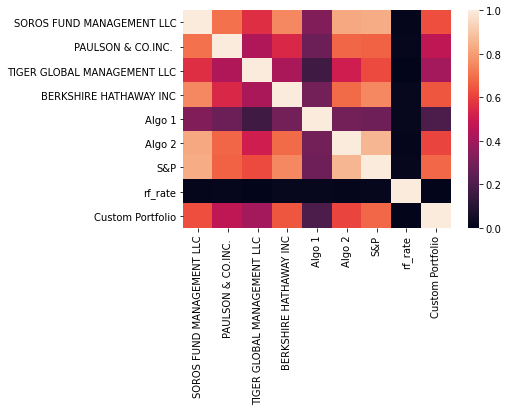

In [59]:
# Displaying the coorelation heatmap

import seaborn as sns # Importing seaborn

sns.heatmap(portfolio_corr,vmin=0,vmax=1)

In [60]:
# Calculating the 60-day rolling beta between the Custom Portfolio and the S&P500

# Calculating the rolling covariance
rolling_covariance = portfolio_returns['Custom Portfolio'].rolling(window = 60).cov(portfolio_returns['S&P'])

# Calculating the rolling variance of S&P500
rolling_variance = portfolio_returns['S&P'].rolling(window = 60).var()

# Calculating the rolling beta between the Custom Portfolio and S&P500

rolling_beta = rolling_covariance / rolling_variance

rolling_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    2.025472
2019-04-17    2.009156
2019-04-18    2.013541
2019-04-22    2.014451
2019-04-23    2.010972
Length: 1036, dtype: float64

<AxesSubplot:xlabel='Date'>

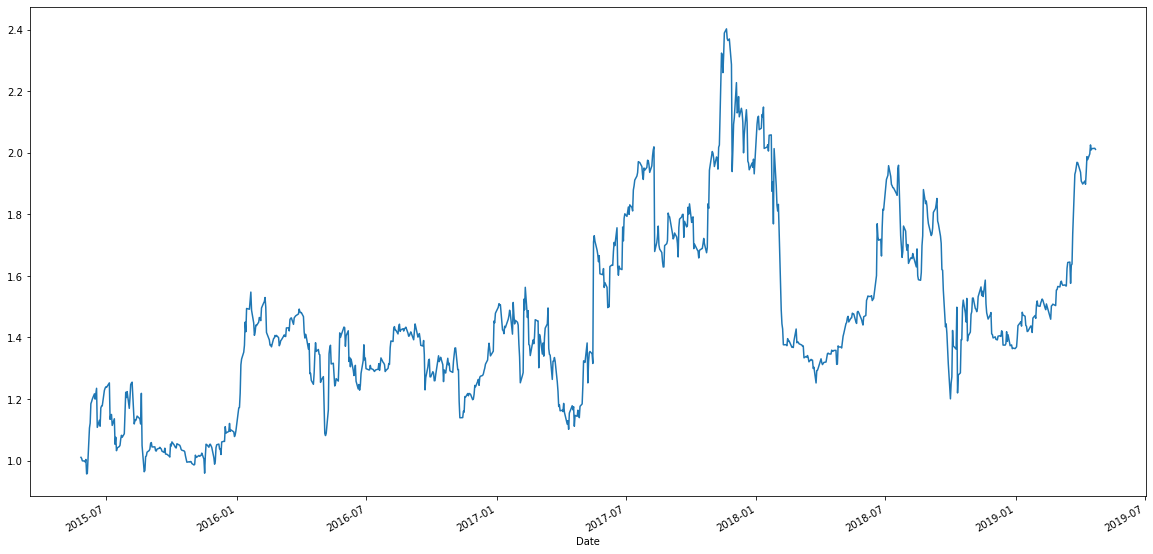

In [61]:
#Ploting the rolling beta between the Custom Portfolio and the S&P500

rolling_beta.plot(figsize=(20,10))

In [62]:
# Calculate the sharp ratio including the Custom Portfolio

portfolio_sharpe_ratio = (((portfolio_returns.mean()-portfolio_returns['rf_rate'].mean())*1036)/(portfolio_returns.std()*np.sqrt(1036) ))
portfolio_sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.412882
PAULSON & CO.INC.             -1.425583
TIGER GLOBAL MANAGEMENT LLC   -0.569213
BERKSHIRE HATHAWAY INC         1.056907
Algo 1                         2.326728
Algo 2                         0.636932
S&P                            0.998030
rf_rate                        0.000000
Custom Portfolio               2.422910
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

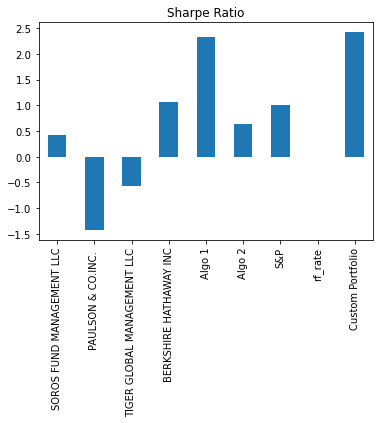

In [63]:
# Plot the sharpe ratio in a bar graph

portfolio_sharpe_ratio.plot.bar(title = 'Sharpe Ratio')

In [64]:
# Caclulate cumulative returns including the Custom Portfolio

cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns.tail() # Display the end values

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P,rf_rate,Custom Portfolio
Date,,,,,,,,,
2019-04-16,1.196720,0.795633,0.859665,1.562007,1.928026,1.275984,1.401888,1.115164,3.556521
2019-04-17,1.193253,0.790488,0.855875,1.567040,1.908166,1.269313,1.398700,1.115460,3.569494
2019-04-18,1.194981,0.791453,0.856372,1.570042,1.907044,1.267753,1.400909,1.115753,3.578646
2019-04-22,1.191891,0.785650,0.853255,1.568335,1.908334,1.265299,1.402326,1.116050,3.616305
2019-04-23,1.200434,0.788388,0.858777,1.589158,1.917818,1.277473,1.414725,1.116347,3.643942


<AxesSubplot:xlabel='Date'>

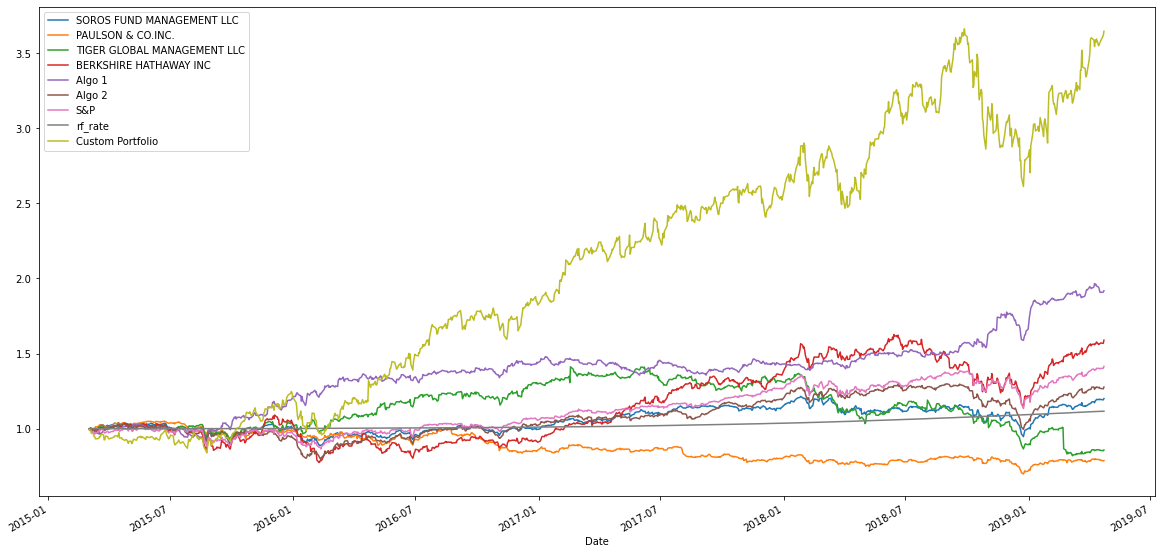

In [65]:
#Plot cumulative returns

cumulative_returns.plot(legend = True, figsize=(20,10))

In [66]:
# The Custom Portfolio outperforms the market, algorithm, and the whales.